In [1]:
#import h5py
import galaxychop as gchop
#import uttr
#import attr
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

# Leo la galaxia

In [3]:
df_gal01 = pd.read_pickle('../../datos_gchop_paper/pickle_agama/df_gal01.pkl')

In [4]:
print(len(df_gal01))

132303


In [7]:
df_gal01.head(3)
df_gal01.keys()

Index(['ptype', 'ptypev', 'm', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'softening',
       'potential', 'kinetic_energy', 'total_energy', 'Jx', 'Jy', 'Jz',
       'label_JThreshold', 'label_JHistogram', 'label_JEHistogram',
       'label_KMeans', 'label_GaussianMixture', 'probs0_GaussianMixture',
       'probs1_GaussianMixture', 'label_AutoGaussianMixture',
       'probs0_AutoGaussianMixture', 'probs1_AutoGaussianMixture',
       'probs2_AutoGaussianMixture', 'probs3_AutoGaussianMixture'],
      dtype='object')

In [6]:
df_gal01.isnull().sum()

ptype                              0
ptypev                             0
m                                  0
x                                  0
y                                  0
z                                  0
vx                                 0
vy                                 0
vz                                 0
softening                          0
potential                          0
kinetic_energy                     0
total_energy                       0
Jx                                 0
Jy                                 0
Jz                                 0
label_JThreshold              126140
label_JHistogram              126140
label_JEHistogram             126140
label_KMeans                  126140
label_GaussianMixture         126140
probs0_GaussianMixture        126140
probs1_GaussianMixture        126140
label_AutoGaussianMixture     126140
probs0_AutoGaussianMixture    126140
probs1_AutoGaussianMixture    126140
probs2_AutoGaussianMixture    126140
p

In [10]:
dfs2 = df_gal01[df_gal01['label_JThreshold'].notna()]
print(len(dfs2.label_JThreshold))

6163


# Analisis Confusion Matrix (% Particulas)

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## Abadi vs Threshold

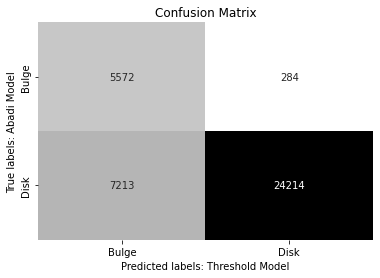

In [11]:
#sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
y_true=dfs2.lab_ab
y_pred=dfs2.lab_th
cm = confusion_matrix(y_true, y_pred)
cm_per = cm*100/len(y_true)

ax= plt.subplot()
sns.heatmap(cm,annot=True, cmap='binary', fmt='g', cbar=False, ax=ax)

#sns.heatmap(cm_per,annot=True, cmap='binary', fmt='.1f', ax=ax)
#for t in ax.texts: t.set_text(t.get_text() + " %")

ax.set_ylabel('True labels: Abadi Model');ax.set_xlabel('Predicted labels: Threshold Model'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Bulge', 'Disk']); ax.yaxis.set_ticklabels(['Bulge', 'Disk']);

In [12]:
y_true=dfs2.lab_ab

In [13]:
print('Negative', len(dfs2.lab_ab[dfs2.lab_ab==0]))
print('Positive', len(dfs2.lab_ab[dfs2.lab_ab==1]))

Negative 5856
Positive 31427



 
|              |Predicted  |                       |
|--------------|-----------|-----------------------|
|Tot = P+N     | Predicted Positive      | Predicted Negative  |
|--------------|-----------|-----------------------|
| Positive (Ptot)    | True Positive (TP)      | False Negative (FN)  |
| Negative  (Ntot)   | False Positive (FP)     | True Negative (TN)   |
|--------------|-----------|-----------------------|


### Precision (Positive Predictive Value PPV)
PPV = TP / (TP + FP) 

The precision is intuitively the ability of the classifier not to label a negative sample as positive.

In [14]:
precision_score(y_true, y_pred)

0.9884072169156666

### Recall (True Positive Rate TPR)
TPR = TP / Ptot = TP / (TP + FN)

The recall is intuitively the ability of the classifier to find all the positive samples.

In [15]:
recall_score(y_true, y_pred)

0.7704839787443918

# Tabla Precision

In [16]:
df = pd.DataFrame(columns=['JHistogram', 'JThreshold', 'JEHistogram', 'KMeans'],
             index=['JHistogram', 'JThreshold', 'JEHistogram', 'KMeans'])
df

,JHistogram,JThreshold,JEHistogram,KMeans
JHistogram,NaN,NaN,NaN,NaN
JThreshold,NaN,NaN,NaN,NaN
JEHistogram,NaN,NaN,NaN,NaN
KMeans,NaN,NaN,NaN,NaN


In [17]:
def precision(y_true,y_pred):
    cm = confusion_matrix(y_true, y_pred)        
    prec = precision_score(y_true, y_pred)
    return prec

############ Fila 1 ##############################    
y_true=dfs2.lab_ab; y_pred=dfs2.lab_ab
df.iloc[0,0] = precision(y_true, y_pred)

y_true=dfs2.lab_ab; y_pred=dfs2.lab_th
df.iloc[0,1] = precision(y_true, y_pred)

y_true=dfs2.lab_ab; y_pred=dfs2.lab_cr
df.iloc[0,2] = precision(y_true, y_pred)
    
y_true=dfs2.lab_ab; y_pred=dfs2.lab_km
df.iloc[0,3] = precision(y_true, y_pred)

############ Fila 2 ############################## 
y_true=dfs2.lab_th; y_pred=dfs2.lab_ab
df.iloc[1,0] = precision(y_true, y_pred)

y_true=dfs2.lab_th; y_pred=dfs2.lab_th
df.iloc[1,1] = precision(y_true, y_pred)

y_true=dfs2.lab_th; y_pred=dfs2.lab_cr
df.iloc[1,2] = precision(y_true, y_pred)

y_true=dfs2.lab_th; y_pred=dfs2.lab_km
df.iloc[1,3] = precision(y_true, y_pred)

############ Fila 3 ##############################   
y_true=dfs2.lab_cr; y_pred=dfs2.lab_ab
df.iloc[2,0] = precision(y_true, y_pred)

y_true=dfs2.lab_cr; y_pred=dfs2.lab_th
df.iloc[2,1] = precision(y_true, y_pred)

y_true=dfs2.lab_cr; y_pred=dfs2.lab_cr
df.iloc[2,2] = precision(y_true, y_pred)

y_true=dfs2.lab_cr; y_pred=dfs2.lab_km
df.iloc[2,3] = precision(y_true, y_pred)

############ Fila 4 ##############################  
y_true=dfs2.lab_km; y_pred=dfs2.lab_ab
df.iloc[3,0] = precision(y_true, y_pred)

y_true=dfs2.lab_km; y_pred=dfs2.lab_th
df.iloc[3,1] = precision(y_true, y_pred)

y_true=dfs2.lab_km; y_pred=dfs2.lab_cr
df.iloc[3,2] = precision(y_true, y_pred)

y_true=dfs2.lab_km; y_pred=dfs2.lab_km
df.iloc[3,3] = precision(y_true, y_pred)




pd.options.display.float_format = '{:,.3f}'.format

df_prec = df
df_prec

,JHistogram,JThreshold,JEHistogram,KMeans
JHistogram,1.000,0.988,0.948,0.979
JThreshold,0.770,1.000,0.769,0.878
JEHistogram,0.950,0.989,1.000,0.983
KMeans,0.869,1.000,0.871,1.000


In [18]:
def recall(y_true,y_pred):
    cm = confusion_matrix(y_true, y_pred)        
    rec = recall_score(y_true, y_pred)
    return rec

df = pd.DataFrame(columns=['JHistogram', 'JThreshold', 'JEHistogram', 'KMeans'],
             index=['JHistogram', 'JThreshold', 'JEHistogram', 'KMeans'])

############ Fila 1 ##############################    
y_true=dfs2.lab_ab; y_pred=dfs2.lab_ab
df.iloc[0,0] = recall(y_true, y_pred)

y_true=dfs2.lab_ab; y_pred=dfs2.lab_th
df.iloc[0,1] = recall(y_true, y_pred)

y_true=dfs2.lab_ab; y_pred=dfs2.lab_cr
df.iloc[0,2] = recall(y_true, y_pred)
    
y_true=dfs2.lab_ab; y_pred=dfs2.lab_km
df.iloc[0,3] = recall(y_true, y_pred)

############ Fila 2 ############################## 
y_true=dfs2.lab_th; y_pred=dfs2.lab_ab
df.iloc[1,0] = recall(y_true, y_pred)

y_true=dfs2.lab_th; y_pred=dfs2.lab_th
df.iloc[1,1] = recall(y_true, y_pred)

y_true=dfs2.lab_th; y_pred=dfs2.lab_cr
df.iloc[1,2] = recall(y_true, y_pred)

y_true=dfs2.lab_th; y_pred=dfs2.lab_km
df.iloc[1,3] = recall(y_true, y_pred)

############ Fila 3 ##############################   
y_true=dfs2.lab_cr; y_pred=dfs2.lab_ab
df.iloc[2,0] = recall(y_true, y_pred)

y_true=dfs2.lab_cr; y_pred=dfs2.lab_th
df.iloc[2,1] = recall(y_true, y_pred)

y_true=dfs2.lab_cr; y_pred=dfs2.lab_cr
df.iloc[2,2] = recall(y_true, y_pred)

y_true=dfs2.lab_cr; y_pred=dfs2.lab_km
df.iloc[2,3] = recall(y_true, y_pred)

############ Fila 4 ##############################  
y_true=dfs2.lab_km; y_pred=dfs2.lab_ab
df.iloc[3,0] = recall(y_true, y_pred)

y_true=dfs2.lab_km; y_pred=dfs2.lab_th
df.iloc[3,1] = recall(y_true, y_pred)

y_true=dfs2.lab_km; y_pred=dfs2.lab_cr
df.iloc[3,2] = recall(y_true, y_pred)

y_true=dfs2.lab_km; y_pred=dfs2.lab_km
df.iloc[3,3] = recall(y_true, y_pred)


pd.options.display.float_format = '{:,.3f}'.format

df_rec = df
df_rec

,JHistogram,JThreshold,JEHistogram,KMeans
JHistogram,1.000,0.770,0.950,0.869
JThreshold,0.988,1.000,0.989,1.000
JEHistogram,0.948,0.769,1.000,0.871
KMeans,0.979,0.878,0.983,1.000


            JHistogram JThreshold JEHistogram KMeans
JHistogram       1.000      0.988       0.948  0.979
JThreshold       0.770      1.000       0.769  0.878
JEHistogram      0.950      0.989       1.000  0.983
KMeans           0.869      1.000       0.871  1.000


Text(0.5, 1.0, 'Precision')

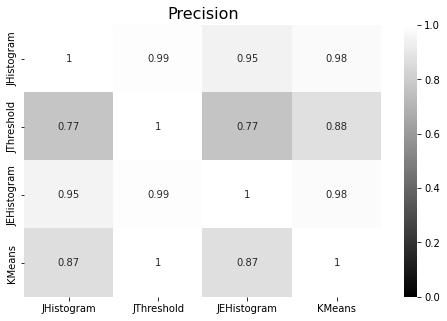

In [19]:
print(df_prec)
df_prec= df_prec[df_rec.columns].astype(float)
plt.figure(figsize=(8,5))
sns.heatmap(df_prec, annot=True, vmin=0, vmax=1, center=0.5, cmap='gray')
plt.title('Precision', fontsize=16)
#plt.savefig('gchop_plots/heatmap_precision.png', dpi=200)

            JHistogram JThreshold JEHistogram KMeans
JHistogram       1.000      0.770       0.950  0.869
JThreshold       0.988      1.000       0.989  1.000
JEHistogram      0.948      0.769       1.000  0.871
KMeans           0.979      0.878       0.983  1.000


Text(0.5, 1.0, 'Recall')

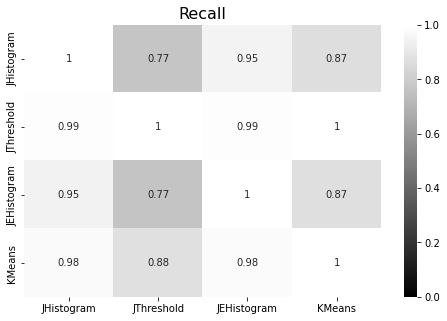

In [20]:
print(df_rec)
df_rec= df_rec[df_rec.columns].astype(float)

plt.figure(figsize=(8,5))
sns.heatmap(df_rec, annot=True, vmin=0, vmax=1, center=0.5, cmap='gray')
plt.title('Recall', fontsize=16)

#plt.savefig('gchop_plots/heatmap_recall.png', dpi=200)

Text(33.0, 0.5, 'KMeans')

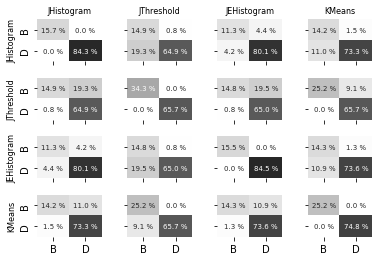

In [21]:
def plotter(y_true,y_pred,ax):
    cm = confusion_matrix(y_true, y_pred); cm_per = cm*100/len(y_true)
    sns.heatmap(cm_per,annot=True, cmap='binary', fmt='.1f', annot_kws={"size": 7},
                vmin=0, vmax=100, center=50, cbar=False, ax=ax)
    for t in ax.texts: t.set_text(t.get_text() + " %")

    return ax



fig,axes = plt.subplots(4, 4, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.4,wspace=0.4)
#axes
ax1=axes[0,0]; ax2=axes[0,1]; ax3=axes[0,2]; ax4=axes[0,3]#; ax5=axes[0,4]
ax6=axes[1,0]; ax7=axes[1,1]; ax8=axes[1,2]; ax9=axes[1,3]#; ax10=axes[1,4]
ax11=axes[2,0]; ax12=axes[2,1]; ax13=axes[2,2]; ax14=axes[2,3]#; ax15=axes[2,4]
ax16=axes[3,0]; ax17=axes[3,1]; ax18=axes[3,2]; ax19=axes[3,3]#; ax20=axes[3,4]
#ax21=axes[4,0]; ax22=axes[4,1]; ax23=axes[4,2]; ax24=axes[4,3]; ax25=axes[4,4]

############ Fila 1 ##############################    
y_true=dfs2.lab_ab; y_pred=dfs2.lab_ab
plotter(y_true, y_pred, ax1)

y_true=dfs2.lab_ab; y_pred=dfs2.lab_th
plotter(y_true, y_pred, ax2)

y_true=dfs2.lab_ab; y_pred=dfs2.lab_cr
plotter(y_true, y_pred, ax3)
    
y_true=dfs2.lab_ab; y_pred=dfs2.lab_km
plotter(y_true, y_pred, ax4)


############ Fila 2 ############################## 
y_true=dfs2.lab_th; y_pred=dfs2.lab_ab
plotter(y_true, y_pred, ax6)

y_true=dfs2.lab_th; y_pred=dfs2.lab_th
plotter(y_true, y_pred, ax7)

y_true=dfs2.lab_th; y_pred=dfs2.lab_cr
plotter(y_true, y_pred, ax8)

y_true=dfs2.lab_th; y_pred=dfs2.lab_km
plotter(y_true, y_pred, ax9)


############ Fila 3 ##############################   
y_true=dfs2.lab_cr; y_pred=dfs2.lab_ab
plotter(y_true, y_pred, ax11)

y_true=dfs2.lab_cr; y_pred=dfs2.lab_th
plotter(y_true, y_pred, ax12)

y_true=dfs2.lab_cr; y_pred=dfs2.lab_cr
plotter(y_true, y_pred, ax13)

y_true=dfs2.lab_cr; y_pred=dfs2.lab_km
plotter(y_true, y_pred, ax14)


############ Fila 4 ##############################  
y_true=dfs2.lab_km; y_pred=dfs2.lab_ab
plotter(y_true, y_pred, ax16)

y_true=dfs2.lab_km; y_pred=dfs2.lab_th
plotter(y_true, y_pred, ax17)

y_true=dfs2.lab_km; y_pred=dfs2.lab_cr
plotter(y_true, y_pred, ax18)

y_true=dfs2.lab_km; y_pred=dfs2.lab_km
plotter(y_true, y_pred, ax19)


########################################## 
#Tick-label
ax16.xaxis.set_ticklabels(['B', 'D'])
ax16.yaxis.set_ticklabels(['B', 'D']);

#Title
ax1.set_title('JHistogram', fontsize=8)
ax2.set_title('JThreshold', fontsize=8)
ax3.set_title('JEHistogram', fontsize=8)
ax4.set_title('KMeans', fontsize=8)
#ax5.set_title('GMM', fontsize=10)
ax1.set_ylabel('JHistogram', fontsize=8)
ax6.set_ylabel('JThreshold', fontsize=8) 
ax11.set_ylabel('JEHistogram', fontsize=8) 
ax16.set_ylabel('KMeans', fontsize=8) 
#ax21.set_ylabel('GMM', fontsize=10) 

#cbar_ax = fig.add_axes([1.1, .3, .03, .4])

#plt.savefig('gchop_plots/matrix_perc_part.png', dpi=200)